<a href="https://colab.research.google.com/github/Sukriti-m/Audio_Sentiment_Analysis/blob/main/Lib_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1txr2NMtzstbo8JO_Z9p_7cQeOTwE6HpE
To: /content/audio.mp3
100%|██████████| 26.1k/26.1k [00:00<00:00, 21.3MB/s]


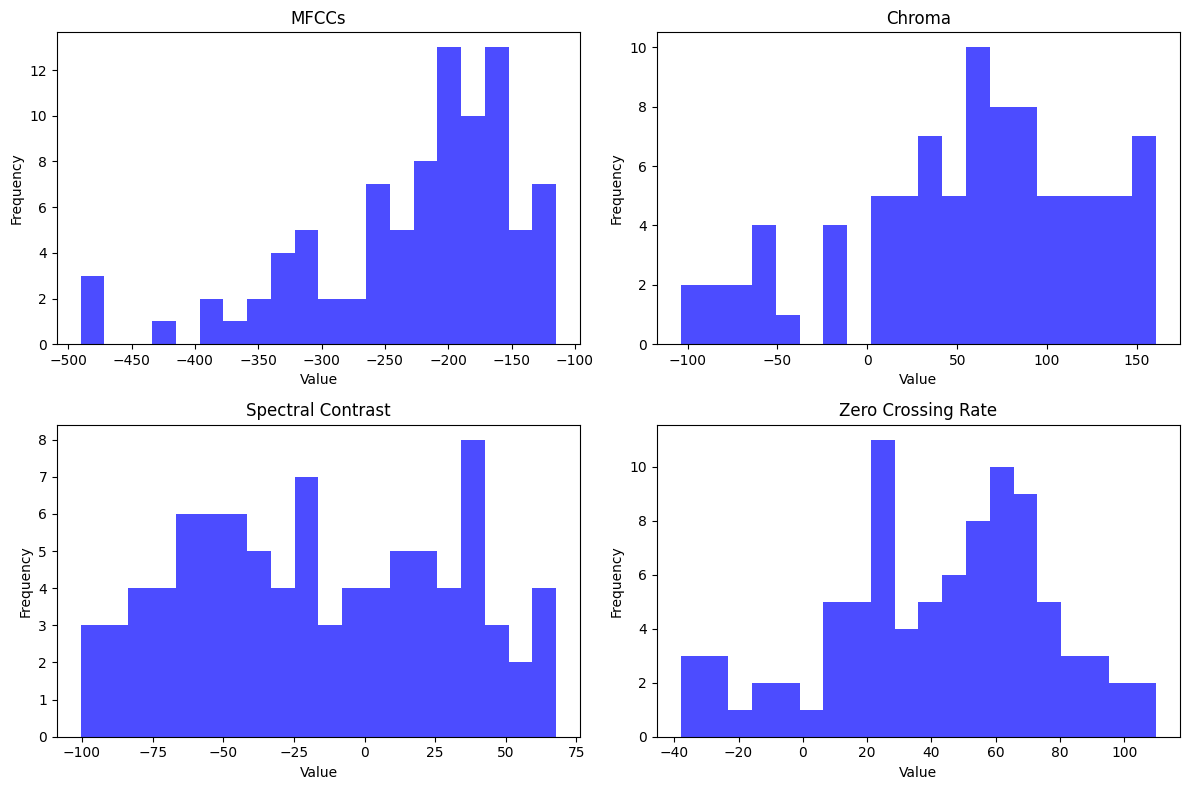

Shape of the feature array: (90, 33)


In [12]:
import librosa
import numpy as np
import gdown
import matplotlib.pyplot as plt


# from google.colab import drive
# drive.mount('/content/drive')
audio_drive_link = "https://drive.google.com/uc?id=1txr2NMtzstbo8JO_Z9p_7cQeOTwE6HpE"

# Define the URL to your audio file
# audio_url = "https://drive.google.com/file/d/1txr2NMtzstbo8JO_Z9p_7cQeOTwE6HpE/view?usp=sharing"
local_audio_path = "/content/audio.mp3"  # You can change the path and file name
gdown.download(audio_drive_link, local_audio_path, quiet=False)

# Load the audio file using Librosa
# audio, sample_rate = librosa.load(librosa.example(audio_url), sr=None)
audio, sample_rate = librosa.load(local_audio_path, sr=None)

# Extract MFCCs (Mel-frequency cepstral coefficients)
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Extract chroma features
chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)

# Extract spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)

# Extract zero-crossing rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)

# Stack the feature matrices vertically to create a single feature array
features = np.vstack([mfccs, chroma, spectral_contrast, zero_crossing_rate])

# Transpose the feature array so that each row represents a feature, and each column represents a frame in time
features = features.T

# Create histograms for each feature
feature_names = ["MFCCs", "Chroma", "Spectral Contrast", "Zero Crossing Rate"]

plt.figure(figsize=(12, 8))

# Ensure that the loop only creates subplots for available features
num_features = min(len(feature_names), features.shape[1])

for i in range(num_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(features[:, i], bins=20, color='b', alpha=0.7)
    plt.title(feature_names[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Shape of the feature array:", features.shape)
